In [7]:
import numpy as np

print(sys.executable)

#data = np.load("vgg_feature.npy")
#label = np.load("label.npy")

#train_data_EI = np.load("vgg\\train_EI.npy")
#test_data_EI = np.load("vgg\\vgg_feature_test_EI.npy")
#train_label_EI = np.load("vgg\\label_train_EI.npy")
#test_label_EI = np.load("vgg\\label_test_EI.npy")

vgg_original_train_data_MBTI = np.load("vgg\\original\\train_data_MBTI.npy")
vgg_original_test_data_MBTI = np.load("vgg\\original\\test_data_MBTI.npy")
vgg_original_train_label_MBTI = np.load("vgg\\original\\train_label_MBTI.npy")
vgg_original_test_label_MBTI = np.load("vgg\\original\\test_label_MBTI.npy")

#vgg_augmented_train_data_MBTI = np.load("vgg\\augmented\\train_data_MBTI.npy")
#vgg_augmented_test_data_MBTI = np.load("vgg\\augmented\\test_data_MBTI.npy")
#vgg_augmented_train_label_MBTI = np.load("vgg\\augmented\\train_label_MBTI.npy")
#vgg_augmented_test_label_MBTI = np.load("vgg\\augmented\\test_label_MBTI.npy")

inception_train_data_MBTI = np.load("inception\\original\\train_data_MBTI.npy")
inception_test_data_MBTI = np.load("inception\\original\\test_data_MBTI.npy")
inception_train_label_MBTI = np.load("inception\\original\\train_label_MBTI.npy")
inception_test_label_MBTI = np.load("inception\\original\\test_label_MBTI.npy")

inception_real_test_data_MBTI = np.load("inception\\real_test_data_MBTI.npy")
inception_real_test_label_MBTI = np.load("inception\\real_test_label_MBTI.npy")

C:\Users\leeh9\anaconda3\envs\ugrp_3\python.exe


In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

####################
#       LDA        #
####################

def overlap(string1, string2):
    count = 0
    for i in range(min(len(string1), len(string2))):
        if string1[i] == string2[i]:
            count = count + 1
    return count

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Logistic Regression", 
         "Linear Discriminant Analysis", "Quadratic Discriminant Analysis"]
         
classifiers = [
    KNeighborsClassifier(8),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    #GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
]

log_cols = ["Classifier", "Accuracy"]
vgg_original_log = pd.DataFrame(columns=log_cols)
#vgg_augmented_log = pd.DataFrame(columns=log_cols)
inception_log = pd.DataFrame(columns=log_cols)
test_log = pd.DataFrame(columns=log_cols)

personality = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP',
 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

print("Original result")
for i in range(5):
    print(personality[inception_real_test_label_MBTI[i]])

for i in range(0, len(classifiers)):

#for classifier in classifiers:
    #classifier.fit(train_data_EI, train_label_EI)
    #predict_EI = classifier.predict(test_data_EI)
    #print(accuracy_score(test_label_EI, predict_EI))

    classifier = classifiers[i]
    classifier.fit(vgg_original_train_data_MBTI, vgg_original_train_label_MBTI)
    #vgg_original_predict_MBTI = classifier.predict(vgg_original_test_data_MBTI)
    #vgg_test_result = classifier.predict(inception_real_test_data_MBTI)
    #print("VGG result")
    #print(vgg_test_result)

    #classifier.fit(vgg_augmented_train_data_MBTI, vgg_augmented_train_label_MBTI)
    #vgg_augmented_predict_MBTI = classifier.predict(vgg_augmented_test_data_MBTI)

    classifier.fit(inception_train_data_MBTI, inception_train_label_MBTI)
    #inception_predict_MBTI = classifier.predict(inception_test_data_MBTI)
    inception_test_result = classifier.predict(inception_real_test_data_MBTI)
    print("Inception result: ", names[i])

    sum = 0
    for j in range(5):
        #print(personality[inception_test_result[j]])
        sum = sum + overlap(personality[inception_real_test_label_MBTI[j]], personality[inception_test_result[j]])
    
    print(sum/20)

    #vgg_original_score = accuracy_score(vgg_original_test_label_MBTI, vgg_original_predict_MBTI)
    #vgg_augmented_score = accuracy_score(vgg_augmented_test_label_MBTI, vgg_augmented_predict_MBTI)
    #inception_score = accuracy_score(inception_test_label_MBTI, inception_predict_MBTI)

    #vgg_original_log_entry = pd.DataFrame([[names[i], vgg_original_score]], columns=log_cols)
    #vgg_augmented_log_entry = pd.DataFrame([[names[i], vgg_augmented_score]], columns=log_cols)
    #inception_log_entry = pd.DataFrame([[names[i], inception_score]], columns=log_cols)
    #vgg_original_log = vgg_original_log.append(vgg_original_log_entry, ignore_index=True)
    #vgg_augmented_log = vgg_augmented_log.append(vgg_augmented_log_entry, ignore_index=True)
    #inception_log = inception_log.append(inception_log_entry, ignore_index=True)

    #print(vgg_original_score, inception_score)

#print(vgg_original_log)
#plt.xlabel('Accuracy')
#plt.title('Classifier Accuracy')
#sns.set_color_codes("muted")
#sns.barplot(x='Accuracy', y='Classifier', data=vgg_original_log, color="g")  
#plt.show()

#lda = LinearDiscriminantAnalysis()
#lda2 = LinearDiscriminantAnalysis()

#lda.fit(train_data_EI, train_label_EI)
#lda_predict_EI = lda.predict(test_data_EI)
#print(accuracy_score(test_label_EI, lda_predict_EI))

#lda2.fit(train_data_MBTI, train_label_MBTI)
#lda2_predict_MBTI = lda2.predict(test_data_MBTI)
#print(accuracy_score(test_label_MBTI, lda2_predict_MBTI))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15035920832730436364
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1408043827
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14307730371901190935
physical_device_desc: "device: 0, name: GeForce MX250, pci bus id: 0000:3a:00.0, compute capability: 6.1"
]
Original result
INTP
ENFJ
ENFJ
ENTP
ENTP
Inception result:  Nearest Neighbors
0.7
Inception result:  Linear SVM
0.65
Inception result:  RBF SVM
0.7
Inception result:  Decision Tree
0.55
Inception result:  Random Forest
0.6
Inception result:  AdaBoost
0.35
Inception result:  Naive Bayes
0.75
Inception result:  Logistic Regression
0.7
Inception result:  Linear Discriminant Analysis
0.55
Inception result:  Quadratic Discriminant Analysis
0.5


                         Classifier  Accuracy  \
0                 Nearest Neighbors  0.128319   
1                        Linear SVM  0.150442   
2                           RBF SVM  0.181416   
3                     Decision Tree  0.148230   
4                     Random Forest  0.159292   
5                          AdaBoost  0.139381   
6                       Naive Bayes  0.132743   
7               Logistic Regression  0.130531   
8      Linear Discriminant Analysis  0.079646   
9   Quadratic Discriminant Analysis  0.068584   
10                Nearest Neighbors  0.120956   
11                       Linear SVM  0.109191   
12                          RBF SVM  0.180882   
13                    Decision Tree  0.162132   
14                    Random Forest  0.163235   
15                         AdaBoost  0.156985   
16                      Naive Bayes  0.100000   
17              Logistic Regression  0.123162   
18     Linear Discriminant Analysis  0.123529   
19  Quadratic Discri

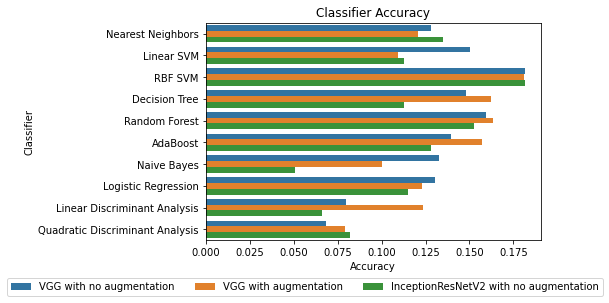

In [42]:
option_1 = ['VGG with no augmentation'] * 10
option_2 = ['VGG with augmentation'] * 10
option_3 = ['InceptionResNetV2 with no augmentation'] * 10

vgg_original_log['Option'] = option_1
#vgg_augmented_log['Option'] = option_2
inception_log['Option'] = option_3

#n1 = vgg_original_log.append(vgg_augmented_log, ignore_index=True)
df = n1.append(inception_log, ignore_index=True)
print(df)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
#sns.set_color_codes("muted")
ax = sns.barplot(x='Accuracy', y='Classifier', data=df, hue='Option')  
ax.legend(loc='upper right', bbox_to_anchor= (1.2, -0.15), ncol=3)
plt.show()
ax.figure.savefig("output_1.jpg", bbox_inches='tight')
